In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython import display
display.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

/tmp/ipykernel_14295/3523346633.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # print figures in svg format


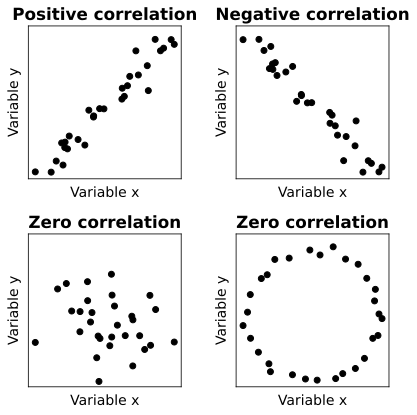

In [3]:
N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)


# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation',fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')


# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation',fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')


# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')


# zero correlation, part 2
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')


plt.tight_layout()
plt.savefig('Figure_04_01.png',dpi=300) # write out the fig to a file
plt.show()

# Exercises


### Exercise 4-1

Write a Python function that takes two vectors as input and provides two numbers as
output: the Pearson correlation coefficient and the cosine similarity value. Write code
that follows the formulas presented in this chapter; don’t simply call np.corrcoef and
spatial.distance.cosine. Check that the two output values are identical when the
variables are already mean centered and different when the variables are not mean
centered.

In [4]:
def corrAndCosine(x,y):
    # compute cosine similarity
    num = np.dot(x,y) # numerator
    den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
    cos = num / den

    # compute correlation (similar to above but mean-centered!)
    xm  = x-np.mean(x)
    ym  = y-np.mean(y)
    num = np.dot(xm,ym) # numerator
    den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
    cor = num / den

    return cor,cos


# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = corrAndCosine(a,b)

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])

0.31675163666873024 0.31675163666873024


### Exercise 4-2

Let’s continue exploring the difference between correlation and cosine similarity.


Create a variable containing the integers 0 through 3, and a second variable equaling
the first variable plus some offset. You will then create a simulation in which you
systematically vary that offset between −50 and +50 (that is, the first iteration of the
simulation will have the second variable equal to [−50, −49, −48, −47]). 

In a for loop, compute the correlation and cosine similarity between the two variables and
store these results. Then make a line plot showing how the correlation and cosine
similarity are affected by the mean offset. You should be able to reproduce

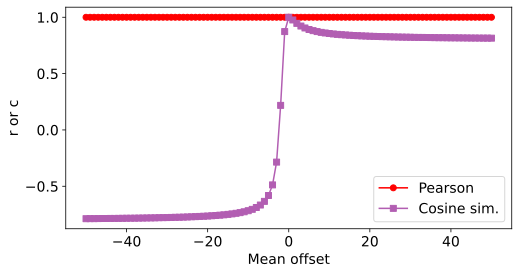

In [8]:
a = np.arange(4,dtype=float)
offsets = np.arange(-50,51)

# initialize the results
results = np.zeros((len(offsets),2))

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a,a+offsets[i])


# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('r')
h[0].set_marker('o')
h[1].set_color([.7,.37,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_04_02.png',dpi=300) # write out the fig to a file
plt.show()

In [7]:
offsets

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50])

In [10]:
a

array([0., 1., 2., 3.])

### Exercise 4-3

There are several Python functions to compute the Pearson correlation coefficient.
One of them is called pearsonr and is located in the stats module of the SciPy
library.

Open the source code for this file (hint: ??functionname) and make sure you
understand how the Python implementation maps onto the formulas introduced in
this chapter.

In [11]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

### Exercise 4-4

Part of the reason is that writing your own functions has huge educational value,
because you see that (in this case) the correlation is a simple computation and not some
incredibly sophisticated black-box algorithm that only a computer-science PhD could
understand. But another reason is that built-in functions are sometimes slower because
of myriad input checks, dealing with additional input options, converting data types,
etc. This increases usability but at the expense of computation time.

Your goal in this exercise is to determine whether your own bare-bones correla‐
tion function is faster than NumPy’s corrcoef function. Modify the function from
Exercise 4-2 to compute only the correlation coefficient. Then, in a for loop over
1,000 iterations, generate two variables of 500 random numbers and compute the
correlation between them. Time the for loop. Then repeat but using np.corrcoef.
In my tests, the custom function was about 33% faster than np.corrcoef. In these
toy examples, the differences are measured in milliseconds, but if you are running
billions of correlations with large datasets, those milliseconds really add up! (Note
that writing your own functions without input checks has the risk of input errors that
would be caught by np.corrcoef.) (Also note that the speed advantage breaks down
for larger vectors. Try it!)

In [15]:
def rho(x,y):
    xm = x-np.mean(x)
    ym = y-np.mean(y)
    n  = np.dot(xm,ym)
    d  = np.linalg.norm(xm) * np.linalg.norm(ym)
    return n/d

In [16]:
# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
    x = np.random.randn(varLength,2)
    rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
    x = np.random.randn(varLength,2)
    pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 174.81 ms
   pearsonr took 188.98 ms


### Exercise 4-5

#### Filtering and Feature Detection Exercises

build an edge detector.

The kernel for an edge detector is very simple: [−1 +1].
The dot product of that kernel with a snippet of a time series signal with constant
value (e.g., [10 10]) is 0. But that dot product is large when the signal has a steep
change (e.g., [1 10] would produce a dot product of 9).
The signal we’ll work with is a plateau function. Graphs A and B in Figure 4-5 show the kernel and the signal. The first step in this exercise is to write code that creates these two time series.

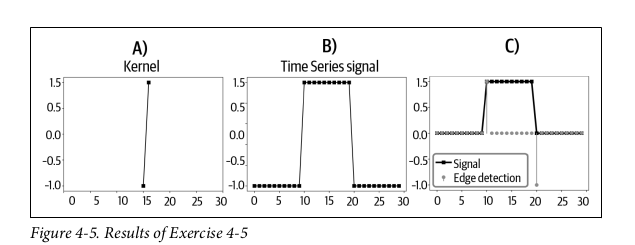

Next, write a for loop over the time points in the signal. At each time point, compute
the dot product between the kernel and a segment of the time series data that has
the same length as the kernel. You should produce a plot that looks like graph C in
Figure 4-5. (Focus more on the result than on the aesthetics.) Notice that our edge
detector returned 0 when the signal was flat, +1 when the signal jumped up, and −1
when the signal jumped down.

Feel free to continue exploring this code. For example, does anything change if you
pad the kernel with zeros ([0 −1 1 0])? What about if you flip the kernel to be [1 −1]?
How about if the kernel is asymmetric ([−1 2])

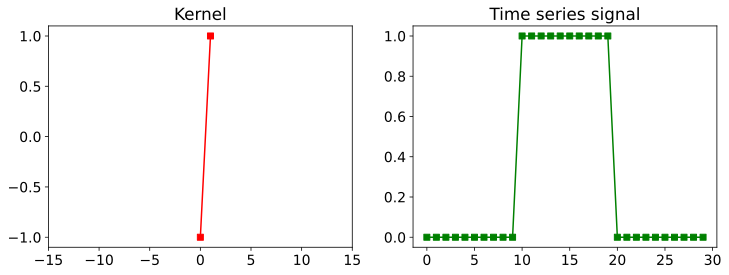

In [34]:
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'rs-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'gs-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_04_04ab.png',dpi=300)
plt.show()

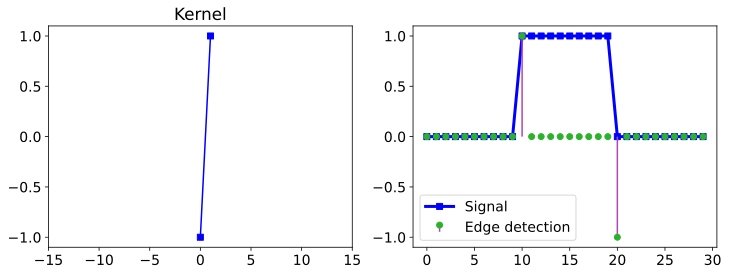

In [29]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

# loop over the signal and do template-matching (via dot products!)
for t in range(1,len(signal)-1):
    featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# plot the result
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'bs-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])


axs[1].plot(signal,'bs-',label='Signal',linewidth=3) # blue
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines,'color',[.7,.27,.7])
plt.setp(markers,'color',[.17,.7,.17])

axs[1].legend()
plt.savefig('Figure_04_04c.png',dpi=300)
plt.show()

### Exercise 4-6

repeat the same procedure but with a different signal and kernel. The
goal will be to smooth a rugged time series. The time series will be 100 random
numbers generated from a Gaussian distribution (also called a normal distribution).
The kernel will be a bell-shaped function that approximates a Gaussian function,
defined as the numbers [0, .1, .3, .8, 1, .8, .3, .1, 0] but scaled so that the sum over
the kernel is 1. Your kernel should match graph A in Figure 4-6, although your signal
won’t look exactly like graph B due to random numbers.

Copy and adapt the code from the previous exercise to compute the sliding time ser‐
ies of dot products—the signal filtered by the Gaussian kernel. Warning: be mindful
of the indexing in the for loop. Graph C in Figure 4-6 shows an example result. You
can see that the filtered signal is a smoothed version of the original signal. This is also
called low-pass filtering.

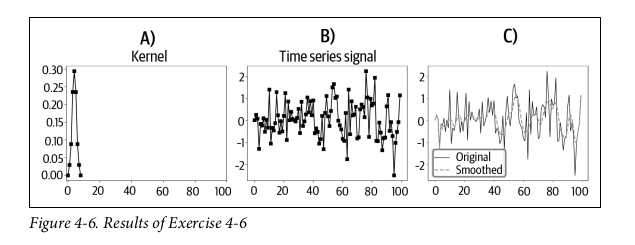

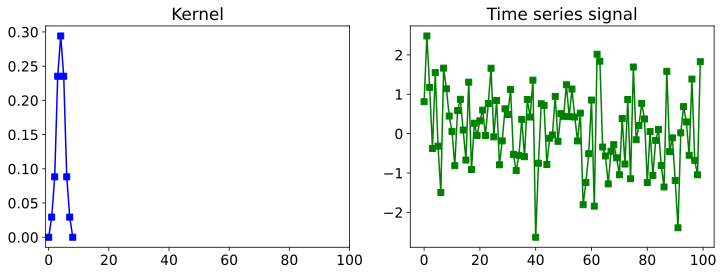

In [38]:
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'bs-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'gs-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_04_06ab.png',dpi=300)
plt.show()

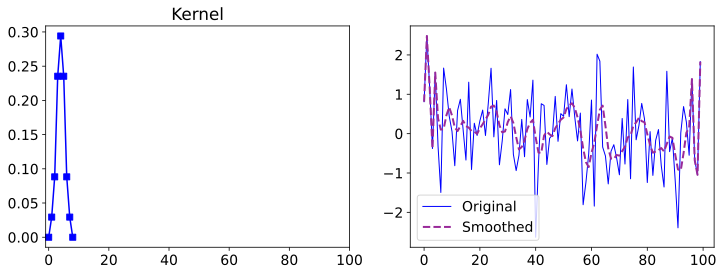

In [42]:
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'bs-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='b',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.16,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_04_06c.png',dpi=300)
plt.show()

### Exercise 4-7

Replace the 1 in the center of the kernel with −1 and mean center the kernel.
Then rerun the filtering and plotting code. What is the result? It actually accentu‐
ates the sharp features! In fact, this kernel is now a high-pass filter, meaning it
dampens the smooth (low-frequency) features and highlights the rapidly changing
(high-frequency) features.

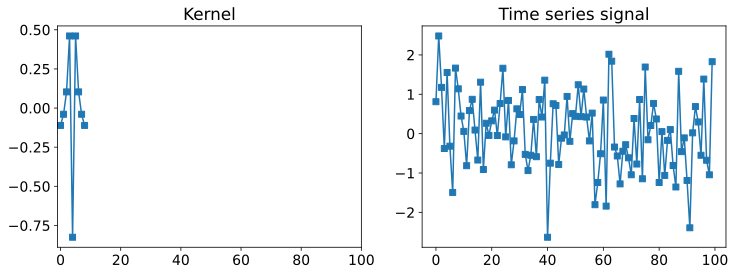

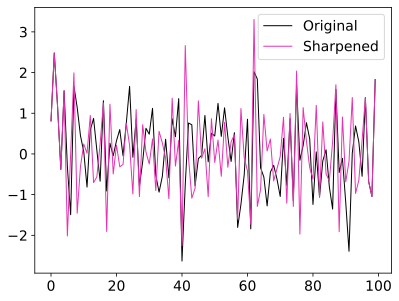

In [46]:
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()



# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

### Exercise 4-8

### k-Means Exercises

One way to determine an optimal k is to repeat the clustering multiple times (each
time using randomly initialized cluster centroids) and assess whether the final clus‐
tering is the same or different. Without generating new data, rerun the k-means code
several times using k = 3 to see whether the resulting clusters are similar (this is a
qualitative assessment based on visual inspection). Do the final cluster assignments
generally seem similar even though the centroids are randomly selected?

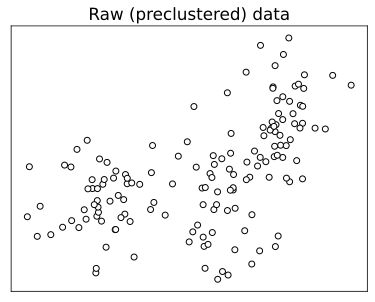

In [47]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

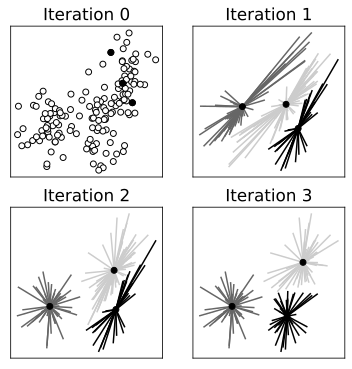

In [50]:
# initialize random cluster centroids
k = 3  # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)), k, replace=False)
centroids = data[ridx, :]


# setup the figure
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
lineColors = [[0, 0, 0], [.4, .4, .4], [.8, .8, .8]]  # 'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:, 0], centroids[:, 1], 'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])


# loop over iterations
for iteri in range(3):

    # step 1: compute distances
    dists = np.zeros((data.shape[0], k))
    for ci in range(k):
        dists[:, ci] = np.sum((data-centroids[ci, :])**2, axis=1)

    # step 2: assign to group based on minimum distance
    groupidx = np.argmin(dists, axis=1)

    # step 3: recompute centers
    for ki in range(k):
        centroids[ki, :] = [
            np.mean(data[groupidx == ki, 0]), np.mean(data[groupidx == ki, 1])]

    # plot data points
    for i in range(len(data)):
        axs[iteri+1].plot([data[i, 0], centroids[groupidx[i], 0]], [data[i, 1],
                          centroids[groupidx[i], 1]], color=lineColors[groupidx[i]])
    axs[iteri+1].plot(centroids[:, 0], centroids[:, 1], 'ko')
    axs[iteri+1].set_title(f'Iteration {iteri+1}')
    axs[iteri+1].set_xticks([])
    axs[iteri+1].set_yticks([])


plt.savefig('Figure_04_03.png', dpi=300)
plt.show()

### Exercise 4-9